<a href="https://colab.research.google.com/github/lefalcon/mi-tarea-una/blob/master/MNA_IAyAA_semana_2_California_Housing_RLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

### **Semana 2**
####**Preprocesamiento de datos numéricos y el Modelo de Regresión Lineal con los datos California Housing Prices**


#**1 - Acceso a los datos**

In [ ]:
# Librerías básicas que estaremos requiriendo en la mayoría de las actividades. 
# Recuerda usar el # para documentar tu código dentro de estas celdas de Código.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns   # para un mejor despliegue de los gráficos

Para este ejercicio usaremos los datos llamados "California Housing Prices", cuyo objetivo es predecir el precio de una casa en el estado de California, EEUU, de acuerdo a varias características dadas de la misma.

Los datos de entrenamiento y prueba se encuentra en dos archivos dentro de la carpeta "sample_data" del Google-Colab. 

Existen varias versiones de dichos datos, inclusive estos que usaremos y que están en el drive del Google-Colab tienen su propia particularidad. Pero con estos es suficiente, ya que el objetivo principal de esta actividad es tener presente algunas de las principales técnicas de preprocesamiento que usualmente se aplican a los datos de tipo numérico.

Sobra decir que existe una gran variedad de pasos y técnicas que podemos aplicar durante la etapa de preprocesamiento en cualquier problema, independientemente del tipo de datos que se tengan. Sabemos que inclusive para un mismo conjunto de datos podemos tener varias opciones a elegir y cada una contar con sus propias ventajas y desventajas. El analista, ingeniero o científico de datos, junto con los tomadores de decisiones de una empresa deberán evaluar y decidir la opción que les brinde el mejor resultado, tomando en cuenta no solo objetivo en sí, sino también las implicaciones en el costo-beneficio que conllevan cada una de estas decisiones.

A lo largo del curso estaremos mostrando poco a poco diferentes técnicas de preprocesamiento y de modelos de aprendizaje a utilizar, los cuales te permitan ir contando con una cartera de opciones al momento de enfrentar los problemas reales de tu empresa. Recuerda que no hay fórmulas o recetas mágicas genéricas que se puedan aplicar a un problema dado, por lo que deberás ir construyendo y aprendiendo a tomar tus propias decisiones sobre la gran diversidad de técnicas y modelos que existen en el mundo del aprendizaje automático.

En esta primera actividad estaremos mostrando algunas de las técnicas que se pueden aplicar en el preprocesamiento de datos numéricos para un problema de regresión lineal múltiple.

####**Californa-Housing-Prices**: 

Como comentamos previamente, usaremos en esta actividad datos para predecir precios de casas en el estado de California, EEUU. Las siguientes ligas te llevan al artículo original de los autores que publicaron en 1997, donde explican el significado de cada variable y la manera en que generaron dicho conjunto de datos a partir del censo de 1990 en California:

https://www.sciencedirect.com/science/article/abs/pii/S016771529600140X

https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html 

Puedes obtener la información del artículo original también en la siguiente liga:

http://www.spatial-statistics.com/pace_manuscripts/spletters_ms_dir/statistics_prob_lets/pdf/fin_stat_letters.pdf

O bien, en esta liga de Kaggle también puedes accesar a los datos y a otra breve descripción del problema:

https://www.kaggle.com/datasets/camnugent/california-housing-prices

Por su parte, la librería de scikit-learn te permite también acceder a ellos a través de su paquete de datos previamente cargados y listos para utilizar, aunque en este caso no están separados en los dos archivos de entrenamiento y prueba:

https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html 

Para complementar esta actividad, te recomendamos la lectura del Capítulo 2, "End-to-End Machine Learning Project" del libro de Aurélien Géron, "Hands-On Machine learning with Scikit-Learn, Keras & TensorFlow", 3rd edition, 2022. 

Tanto este libro como otros que estaremos usando de la editorial O'Reilly, los puedes accesar en la biblioteca digital del Tecnológico de Monterrey:  https://biblioteca.tec.mx/inicio siguiendo la ruta: 

Recursos --> Bases de datos --> E --> Ebooks O'Reilly.









In [ ]:
# Queremos accesar el archivo que está en la carpeta "sample_data" en la cual nos encontramos de manera  
# predeterminada y que podemos verificar con el siguiente comando que nos permite listar sus archivos
# y directorios:

!ls

sample_data


In [ ]:
# La siguiente instrucción nos permite adentrarnos en dicha carpeta y de nuevo listamos lo que hay dentro de ella:

%cd sample_data/

!ls

/content/sample_data
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


**NOTA-Opcional:**Si deseas conocer más sobre los principales comandos de Linux, puedes consultar la siguiente liga:

https://www.hostinger.mx/tutoriales/linux-comandos 

In [ ]:
# En particular, los datos para el entrenamiento los encontramos obviamente en el siguiente archivo, el cual procedemos a cargar: 

datatrain = pd.read_csv("california_housing_train.csv", sep=",")
datatrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


En particular observamos que esta versión contiene solamente datos numéricos.

**NOTA**: Observa que en la instrucción anterior, para leer los datos del archivo estamos indicando que los datos están separados por comas. Puedes obtener dicha información realizando una inspección del archivo abriéndolo con cualquier editor de textos, o bien, con el comando "cat" de Linux ejecutando la siguiente instrucción, la cual estoy comentando para no tener que desplegar toda la información de manera predeterminada.

In [ ]:
#!cat california_housing_train.csv

In [ ]:
# Procedemos de manera análoga para leer y cargar el archivo con los datos de Prueba:

datatest = pd.read_csv("california_housing_test.csv", sep=",")
datatest.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


De cualquier de las ligas dadas anteriormente, sabemos que la variable de salida es el precio medio (mediana) de la casa en dólares estadounidenses, "median_house_value".

In [ ]:
# Veamos la cantidad de datos que tenemos:

print('Tamaño datos de Entrenamiento:', datatrain.shape)
print('Tamaño datos de Prueba:', datatest.shape)

Tamaño datos de Entrenamiento: (17000, 9)
Tamaño datos de Prueba: (3000, 9)


De un total de 20 mil registros, 17 mil son del conjunto de entrenamiento y 3 mil del conjunto de prueba.

Es decir, que esta partición dada a partir de los dos archivos, implica tener un 85% de los datos totales en el conjunto de entrenamiento y un 15% en el conjunto de prueba.

Tenemos 8 variables de entrada (también llamadas factores, predictores, características, o lo que usualmente llamamos variables independientes en los cursos de matemáticas) que podemos representar con la variable $X$. Y por otro lado tenemos 1 variable de salida (también llamada variable objetivo, de respuesta, o lo que usualmente llamamos variable dependiente) que denotaremos como $y$. Así, nuestro objetivo durante el proceso de aprendizaje automático supervisado es encontrar un modelo $f$ que a partir de los valores de las variables de entrada $X$, podamos predecir los valores de salida $y$, simbólicamente: $y = f(X)$.



#**2 - Conjuntos de Entrenamiento, Validación y Prueba & Validación-Cruzada**

Recuerda que en cualquier problema de aprendizaje automático, AA, (machine learning) lo recomendable es trabajar con una triple partición del universo de datos con los conjuntos de Entrenamiento, Validación y Prueba.

Esto se debe a que no debemos usar todo el conjunto de datos (los 20 mil en este caso) para construir nuestro modelo (o entrenarlo) y al mismo tiempo para verificar que tan bien lo estamos haciendo. Usar datos que ya hemos usado para construir nuestro modelo para ahora evaluar qué tan bien lo estamos haciendo, no sería de gran valor, ya que son datos que se han conocido durante el entrenamiento y por lo tanto no representan un gran reto para tratar de hacer predicciones con ellos. Los resultados serían por lo tanto demasiado optimistas.

Usar todo el universo de datos para entrenar y validar nuestro modelo nos lleva en general al llamado problema del "sobreentrenamiento", también llamado "sobreajuste" ("overfitting" en inglés). En otras palabras, el modelo podría simplemente estarse memorizando los datos que ha estado usando, por lo que al momento de querer hacer predicciones con datos nuevos reales que nunca ha visto, no daría buenas predicciones.

Para evitar esto, usamos el conjunto llamado de Entrenamiento (Training en inglés) para obtener los parámetros del modelo. Posteriormente, verificamos qué también puede hacer predicciones el modelo con el conjunto llamado de Validación (Validation en inglés) y que nos ayuda a simular a los datos reales nuevos que nunca ha visto nuestro modelo. Pero hay que recordar que en el caso del aprendizaje supervisado, el proceso de entrenamiento del modelo se lleva a cabo de manera iterativa, buscando en cada iteración obtener mejores predicciones. Esto implica que si con el conjunto de validación no se obtienen buenos resultados, debemos hacer ajustes al modelo  o inclusive probar otro modelo y volverlo a entrenar con los datos de entrenamiento, para después validarlo de nuevo con el conjunto de validación, esperando haber incrementado su desempeño. Este proceso iterativo se sigue repitiendo hasta alcanzar un desempeño que consideremos adecuado. 

Ahora, como el conjunto de Validación se ha estado utilizando varias veces para hacer los ajustes de nuestro modelo en este proceso iterativo, de alguna manera ya también nuestro modelo final ha estado aprendiéndose el comportamiento de estos. Es por ello que para obtener el desempeño final del modelo generado, usamos ahora el llamado conjunto de Prueba (Test) para medir dicho desempeño. Estos datos de prueba nunca se han usado en el proceso de entrenamiento, ni en el de validación, por lo que estarán simulando de mejor manera aquellos datos reales nuevos que nuestro modelo nunca ha visto. 

Ver la imagen a continuación:






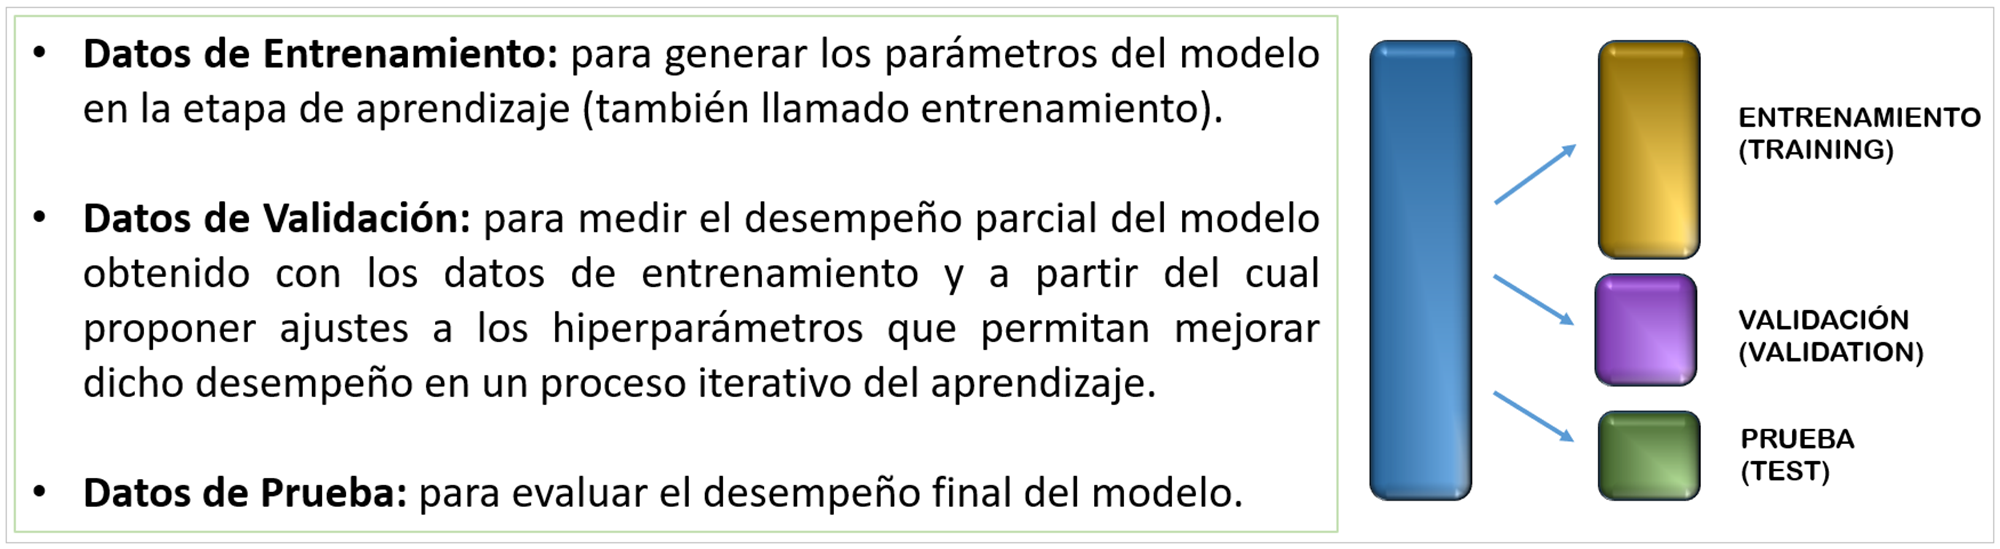

####**Evitar la filtración de información:**

####**En resumen, durante toda la etapa del preprocesamiento de los datos y en el entrenamiento de los modelos, toda la información que desees obtener y generar deberá ser a partir del conjunto de Entrenamiento y la información obtenida de dicho conjunto aplicarla a los datos de los conjuntos de Validación y de Prueba.**

Por ejemplo, si a partir de un análisis con los conjuntos de entrenamiento decides escalar los factores de entrada mediante la transformación $\frac{x-min}{max - min}$, donde $min$ y $max$ son los datos mínimo y máximo del conjunto de entrenamiento, entonces con estos mismos valores deberás llevar a cabo el escalamiento en los conjuntos de validación y prueba. De no hacerlo así se está filtrando información a los datos que están simulando los de la vida real de los cuales no conocemos nada de antemano. Este es el llamdo filtrado de información (data leakage en inglés).

**Variabilidad de los resultados en cada repetición de un proceso de entrenamiento y Validación-Cruzada:**

Debido a la aleatoriedad de muchas de las transformaciones durante la etapa de limpieza, o de los procesos internos en los algoritmos numéricos de por ejemplo los métodos de optimización, así como durante el entrenamiento mismo de cada modelo de aprendizaje automático, se espera en general obtener resultados un poco diferentes en cada repetición de un modelo generado. Si nuestro modelo está bien construido, se espera que en cada una de estas repeticiones dicha variabilidad de resultados no sea muy marcada. Por ello lo recomendable en estos casos es tomar un promedio de todos estos resultados para tener un valor del desempeño más estable y no quedarnos por aleatoriedad con el de mejor o peor de los casos. Es aquí donde la técnica de **Validación-Cruzada** de parámetro $k$ (Cross-Validation en inglés) nos ayuda al respecto. Dicho proceso lleva implícito la repetición de esta etapa de entrenamiento $k$ veces de una manera muy particular, como veremos a continuación.

Habrás notado en el presente ejemplo que Google-Colab solamente nos comparte dos archivos, el del conjunto de "Entrenamiento" y el de Prueba. ¿Y dónde está entonces el conjunto de Validación en estos casos? La respuesta es que en estos casos se está decidiendo utilizar la técnica de validación-cruzada. Y en este proceso el conjunto que estamos llamado inicialmente de "Entrenamiento", se utilizará en realidad para generar los conjuntos de entrenamiento y validación. Es decir, se siguen utilizando 3 conjuntos, el de entrenamiento, el de validación y el de prueba; pero el método de validación-cruzada se encargará de generar los conjuntos de entrenamiento y validación, a partir del que nosotros estamos llamando inicialmente "Entrenamiento". 

Cuando en esta sección usemos comillas como en "Entrenamiento", estaremos indicando que este conjunto en realidad se deberá dividir nuevamente en los conjuntos de entrenamiento y validación, aunque de manera automática a través de la validación-cruzada.    

A continuación se muestra una diagrama ejemplificando el caso de valiadación-cruzada con $k=5$ y cuyos pasos los podemos indicar como sigue (ver diagrama que está a continuación):


####Pasos a seguir con el método de **Validación-Cruzada** con $k=5$ en un problema de aprendizaje supervisado:

1.   Seleccionar un modelo de aprendizaje automático e inicializar sus hiperparámetros con los valores deseados. Seleccionar además una métrica para medir el desempeño del modelo. 
2.   El conjunto inicial de datos se divide en dos subconjuntos que llamaremos "Entrenamiento" y Prueba.
3.   Como estamos seleccionando $k=5$ en este ejemplo, ahora el conjunto que llamanos "Entrenamiento" lo particionamos en $5$ partes.
4.   Para cada una de las $j=1,2,...,k$ particiones, repetir lo siguiente (con el modelo, hiperparámetros y métrica seleccionados):

  > Usar el subconjunto llamado PARTE $j$ como conjunto de Validación y el resto de las $k-1=4$ PARTES como conjunto de entrenamiento del modelo. Recuerda que con el conjunto de validación obtienes un desempeño parcial del modelo.
5.   Promediar los desempeños de las $k=5$ particiones anteriores que se obtuvieron con sus conjuntos de validación respectivos.
6.   (Opcional) Promediar los $k=5$ desempeños obtenidos con los conjuntos de entrenamiento correspondientes. Este paso opcional puede apoyar para dar un mejor seguimiento al sobreentrenamiento o subentrenamiento (overfitting/underfitting) del modelo.
7.   Obtener el desempeño final del modelo usando el conjunto de Prueba.  
8.   Evaluar finalmente el sobreentrenamiento y subentrenamiento del modelo, comparando los valores promedio de los desempeños obtenidos con los conjuntos de Validación y Prueba (y también con el de Entrenamiento, en caso de haberlo obtenido en el paso 6 opcional). 




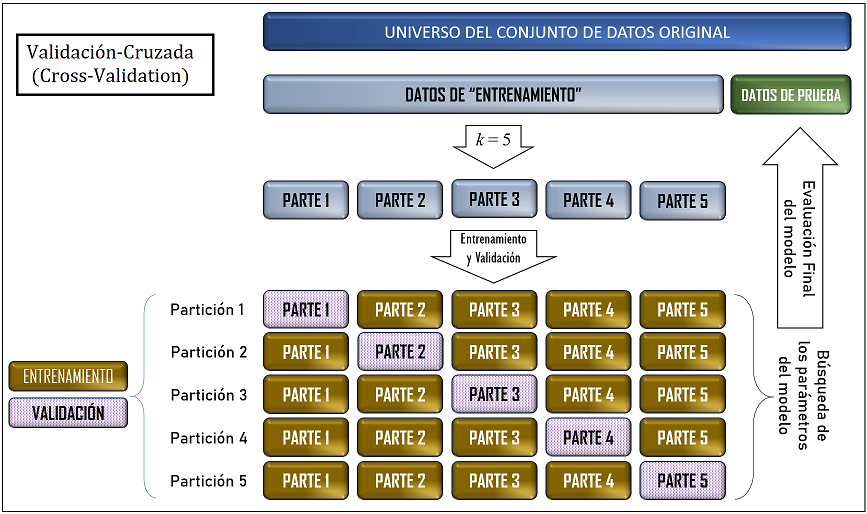

**NOTA-Opcional:** Si deseas conocer más sobre Validación-Cruzada, puedes consultar la documentación de scikit-kearn en la siguiente liga:

https://scikit-learn.org/stable/modules/cross_validation.html 

Recuerda que los algoritmos de aprendizaje automático rara vez entregan un modelo óptimo con un error de cero en sus predicciones presentes y futuras. Y con los modelos a utilizar en problemas de la vida real, sería una utopía esperar que este sea perfecto con 0% de errores. La aleatoriedad está presente en la mayoría de las decisiones que se van tomando en cada etapa de la solución propuesta, de tal manera que al repetir nuevamente todo el proceso desde el inicio, obtendremos seguramente resultados diferentes. Mencionemos por ejemplo algunas de las decisiones o proceso más evidentes que nos llevan a generar modelos diferentes: el porcentaje y proceso de partición de los datos iniciales para obtener los conjuntos de entrenamiento, validación y prueba; las transformaciones que cada científico de datos decide aplicar en el proceso de preparación y limpieza de los datos; los valores de los hiperparámetros seleccionados para el modelo de aprendizaje automático que se está entrenando; el proceso de entrenamiento mismo, muchos de los cuales incluyen algoritmos numéricos con decisiones aleatorias, como el método del gradiente descendente estocástico; inclusive el uso de librerías diferentes, ya que aún cuando usemos funciones que en principio realizan las mismas tareas, internamente cada librería toma sus propias decisiones. 

En particular, cuando se desee la predicción en el futuro del valor de nuevas casas en alguna región de California, sabemos que sus precios pueden fluctuar por una gran cantidad de factores internos y externos, pero en particular por la variación dinámica en el tiempo de los factores que hemos considerado en nuestros datos. Por mencionar algunos: la edad de las casas se incrementa cada año y esto nos lleva a que algunas de ellas aumenten su valor y otras por el contrario, disminuyan; la cantidad de habitantes va cambiando de forma diferente en cada región; los salarios promedio en cada zona de California también irán variando de forma diferente. 

¿Qué otros factores internos o externos consideras que pueden estar afectando y cambiando la generación de un modelo que predice el valor promedio de una casa en California?        



#**3 - Transformaciones durante el Preprocesamiento**

###**Pipeline**

Sabemos que para la etapa del proprocesamiento o preparación de los datos existe una gran variedad de transformaciones y técnicas de limpieza que podríamos hacer todo un curso solo con dichos tópicos. Sin embargo, aunque en este curso nuestro objetivo principal es el estudio de los modelos de aprendizaje automático, estaremos repasando y aplicando algunas de las principales técnicas que se utilizan durante la etapa de la preparación de los datos.

Además, para gestionar el flujo de trabajo en esta etapa del preprocesamiento de los datos haremos uso de la clase Pipeline de Scikit-Learn. La traducción literal de pipeline es tubería, pero seguiremos usando el término pipeline como comúnmente se hace aún en nuestro idioma dentro del área de aprendizaje automático.

El objetivo de la clase Pipeline es facilitar y automatizar parte del proceso de limpiado y preparación de los datos mediante la secuenciación de varios de dichos pasos. Por otro lado, esto ayudará también a disminuir un poco la gran cantidad de tiempo que usalmente invierte el científico de datos en esta etapa del problema y en particular en nuestro curso ayudará a no desviarnos demasiado de nuestro objetivo principal, que es la de conocer y generar modelos de aprendizaje automático.  

**NOTA-Opcional:** Si deseas conocer más sobre Pipelines, puedes consultar la documentación de sciki-learn en la siguiente liga:

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html 



Ya vimos que los datos del California Housing Prices tiene solamente variables numéricas, así que nos concentraremos por el momento en las transformaciones y operaciones de limpieza para este tipo de datos.

Sabemos que para datos numéricos es usual aplicar algunas de las siguientes técnicas de preparación en los problemas de aprendizaje supervisado: 

*   Imputación de datos perdidos
*   Transformaciones minMax o estandarizacion para ajustar el rango de las variables de entrada.
*   Transformaciones log o potencia para ajustar la distribución de las variables.

Además, recuerda que para evitar el filtrado de información, se requiere llevar a cabo este proceso primero en los datos de Entrenamiento y posteriormente con la información obtenida aplicarlos a los conjuntos de Validación y de Prueba.

Asimismo, estos pasos del preprocesamiento se deberán aplicar no solo al inicio de problema, sino que una vez entrenado y obtenido el mejor modelo, se deberán aplicar también estos mismos pasos con los datos nuevos reales.

De aquí que el uso de los pipelines será una manera muy práctica de empaquetar y llevar a cabo esta tarea, sobre todo cuando tenemos muchos registros y factores.



###**Inspección inicial, gráfica y numérica**

Apliquemos primeramente el método info() de Pandas para obtener una primera información básica de nuestros datos de entrenamiento. **Recuerda que la información que desees obtener para construir tu modelo de aprendizaje automático debe provenir únicamente del conjunto de entrenamiento y no usar en absoluto información del conjunto de prueba o validación.**

In [ ]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Esta salida nos dice que efectivamente tenemos 17 mil registros en el conjunto de entrenamiento, indexados del 0 al 16999. Además de 9 columnas, donde sabemos que la última es la variable de salida, "median_house_value".

Y como observamos, no tenemos ningún dato perdido en ninguna de las variables, las cuales son todas de tipo numérico.

Sin embargo, no sabemos si en los datos de validación, prueba o en los datos reales que se estarán usando en el futuro podamos tener datos perdidos en alguna de estas variables. De aquí que debemos incluir de todas maneras el proceso de imputación, previniendo que se lleguen a tener datos perdidos más adelante. 

Veamos primeramente los histogramas de todas nuestras variables, y tratar de obtener un poco más de información.

In [ ]:
sns.set(rc={'figure.figsize':(10,12)})   # (ancho-columnas, altura-renglones) Ajustemos el tamaño de la ventana 
                                         # que desplegará los gráficos usando la librería de seaborn (sns).

**NOTA-Opcional:** La librería seaborn te premite generar mejores gráficos en Python y está basado en la librería matplotlib. En este curso lo importante no es la visualización, pero nos apoyaremos en dicha librería cuando la diferencia de resultados nos brinde mejor información. 

Si lo deseas, puedes revisar la documentación correspondiente o apoyarte en  esta liga con los primeros pasos en seaborn:

https://seaborn.pydata.org/introduction.html 

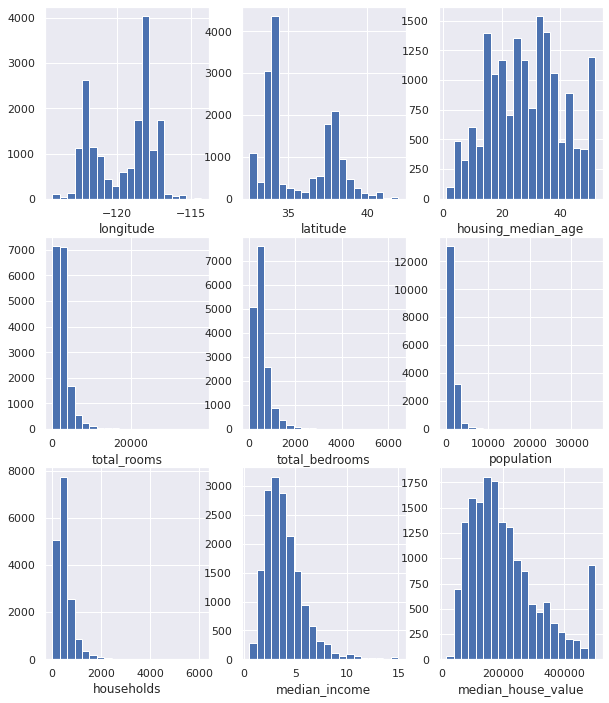

In [ ]:
fig, axes = plt.subplots(3, 3)    # Definimos una ventana de 3x3 nichos para incluir en cada uno de ellos un gráfico.
for k in range(0,9):
  plt.subplot(3,3,k+1)     # Los nichos para cada histograma se numeran iniciando en 1.
  plt.hist(datatrain[datatrain.columns[k]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(datatrain.columns[k])
plt.show()

Comentemos algunas de las particularidades que se observan en varios de estos histogramas.

Por ejemplo, la longitud y latitud son claramente bimodales; los valores sobre el eje horizontal de estas nueve variables numéricas varían desde las decenas, hasta los cientos de miles; los histogramas del segundo y tercer renglón tienen claramente un sesgo positivo; al menos la variable de salida "median_house_value" parece estar acotada superiormente por un valor máximo que se refleja en la barra en la parte derecha.

Cada una de estas características nos puede llevar a aplicar alguna técnica de procesado de los mismos.

Complementemos esta información con un resumen descriptivo numérico de todas nuestras variables numéricas.

In [ ]:
datatrain.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



Puedes nuevamente observar de esta tabla varias de las características que mencionamos previamente a partir de los histogramas.

###**Datos perdidos, escalamiento y ajuste de sesgos**


Ahora, en el proceso de construcción de nuestro pipeline y como primer paso en nuestra preparación de los datos, consideremos la imputación de posibles datos perdidos en los datos de validación y prueba. Para ello usaremos el método de imputación con el valor de la mediana. Usar la mediana en las variables con marcado sesgo positivo se justifica mejor que la media.

Por el momento aplicaremos el valor de la mediana como proceso de imputación a todas las variables como una primera aproximación. Pero sería importante retomar más adelante el comentario que hicimos previamente sobre el comportamiento bimodal de las variables longitud y latitud y preguntarnos si la mediana sería la mejor opción. ¿Qué crees que debiera aplicarse en este caso? Repito, por el momento solo piensa en ello.   

Como segundo paso en nuestro pipeline, aplicaremos la transformación minMax en las variables de entrada. Esto nos llevará por el momento a transformar nuestros datos de entrada al intervalo cerrado [0, 1]. Recuerda que este tipo de transformaciones, llamadas usualmente de escalamiento, ayuda a que todas las variables sean en principio igualmente competitivas en cuanto a su relevancia en la construcción del modelo de aprendizaje automático. Es decir, no se desea que una variable empiece a tener mayor relevancia en la solución de un problema simplemente porque sus unidades en las cuales fueron capturados dichos datos son mayores en magnitud a las demás. Además, dicha transformación ayuda a que los métodos de minimización del error como el gradiente descendente, no oscilen demasiado alrededor del valor mínimo buscado. Ver la siguiente figura que ilustra este problema. En particular el método de regresión lineal que usaremos en este ejemplo se ve muy afectado cuando exite este tipo de diferencia de magnitudes entre factores.




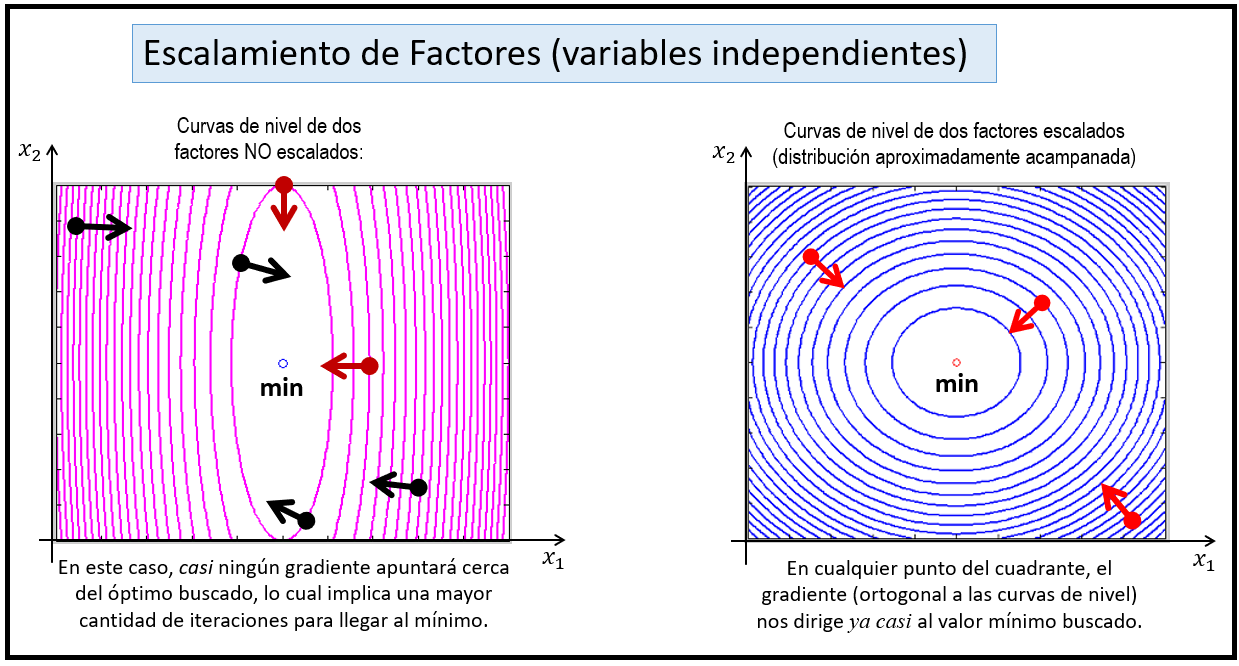

Como tercer paso en nuestro pipeline, aplicaremos la transformación raíz cuadrada en las variables que comentamos están claramente con sesgo positivo. En general se suele aplicar también la transformación logaritmo, o la de potencia, las llamadas box-cox y yeo-johnson para ayudar a ajustar el sesgo en la distribución de los datos. 

Este tercer paso lo podemos justificar por el momento observando los siguientes histogramas de las variables que hemos indicado previamente que tienen un marcado sesgo positivo:

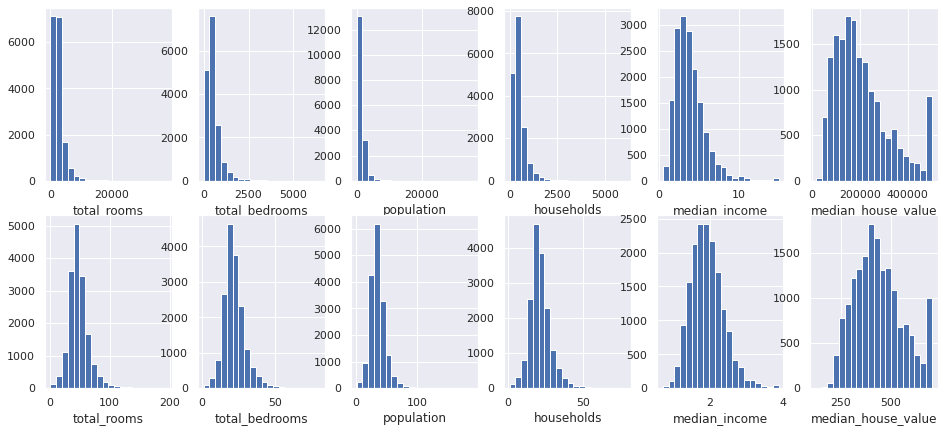

In [ ]:
sns.set(rc={'figure.figsize':(16,7)})

fig, axes = plt.subplots(2, 6)    
for k in range(3,9):             # grafiquemos por el momento solo los factores con marcado sesgo positivo.
  plt.subplot(2,6,k-2)

  tmp = datatrain[datatrain.columns[k]]   # datos originales.
  plt.hist(tmp, bins=20)
  plt.xlabel(datatrain.columns[k])

  plt.subplot(2,6,k+4)
  tmp = np.sqrt(datatrain[datatrain.columns[k]])   # datos con alguna transformación para ajuste de la distribución.
  plt.hist(tmp, bins=20)
  plt.xlabel(datatrain.columns[k])

plt.show()

El resultado en cuanto a disminución del sesgo es bastante notorio, por lo que continuaremos con esta decisión.

Recuerda que este tipo de ajuste que modifican la distribución de los datos de entrada ayuda en ocasiones también a manejar mejor los datos de la cola, los cuales se estarían comportando como valores extremos (outliers) y se sabe que los outliers afectan en gran medida a ciertos modelos de aprendizaje automático, sobre todo aquellos basados en métodos de regresión y en algoritmos como el gradiente descendente. También se justifica si se desea aplicar pruebas como la $t$-student para validar la significancia de los coeficientes en modelos de regresión. Sin embargo, modelos como los basados en árboles de decisión estrictamente no les ayuda, pero tampoco les afecta el que se apliquen este tipo de transformaciones.


Finalmente, este mismo ajuste del sesgo en la variable de salida con la raíz cuadrada ayudará a cumplir con una de las hipótesis de los modelos de regresión lineal, a saber, que sus residuos tengan una distribución aproximadamente gaussiana, lo cual se satisface mejor cuando la distribución original es aproximadamente gaussiana. 

###**Comentarios adicionales: valores perdidos**

Hablemos un poco más en relación a los datos perdidos.

Existen varias técnicas para el tratamiento de los valores perdidos, pero por el momento mencionemos algunas de las más usadas:


1.   Eliminar todos los registros (renglones) que tengan al menos un dato perdido.
2.   Eliminar la variable (columna) que tengan al menos un dato perdido.
3.   Asignar o imputar los valores perdidos de una variable con algún valor particular (valor promedio, valor constante, etc).  
4.   Imputar los valores perdidos de una variable con algún valor particular y agregar una columna nueva de valor binario, que indique con valor 1 si a dicha variable se le imputó un valor, y con un valor de 0 en caso contrario.

Los primeros dos casos pueden ser decisiones muy drásticas, sobre todo si no se tienen muchos datos y la cantidad de valores perdidos es relatiavamente pequeña. En general intenta siempre primero imputar dichos datos perdidos, antes de querer eliminarlos. O bien, si los datos fueron generados por algún equipo de trabajo de tu empresa, platica con ellos para obtener mayor información sobre la naturaleza de dichos datos perdidos, esto te ayudará a tomar una mejor decisión.

Además, independientemente de cualquier decisión que tomes en cada momento, siempre justifica y documenta dicha decisión y valídala con tu equipo de trabajo. Esto te permitirá tener modelos bien documentados que serán de mucha ayuda a tu empresa en las etapas posteriores de mejoramiento y escalamiento del modelo.  

**NOTA-Opcional:** si deseeas conocer más sobre otros métodos de imputación con scikit-learn, puedes consultar la siguiente liga:

https://scikit-learn.org/stable/modules/impute.html 


#**4 - Métricas de desempeño: $R^2$, $R^2\_adj$ y $RMSE$**

Una vez entrenado el modelo de aprendizaje automático que se haya elegido, se debe seleccionar una métrica para que nos diga qué tan bien, en promedio, se están llevando a cabo las predicciones con los datos de validación y prueba.

La manera general en que funcionan dichas métricas, es midiendo qué tan diferentes en promedio son las predicciones hechas con el modelo entrenado, $\hat{y}$, de los valores observados dados de la variable de salida, $y$. En un problema de regresión a esta diferencia se le llama usualmente error o residuo y se representa como $\varepsilon = y - \hat{y}$. El contar desde un inicio con la información de los valores observados de la variable de salida para cada registro, es la característica que identifica a los modelos de aprendizaje supervisado. A través de estos errores o residuos se mide el desempeño del modelo generado.

Existe una gran variedad de métricas diferentes basada en los residuos. A lo largo del curso estaremos estudiando varias de ellas. Sobra decir que todas tienen sus pros y sus contras.

Cuando se utiliza la técnica de validación-cruzada, en cada partición debemos medir el desempeño o el error con la métrica elegida y con los datos del conjunto de validación. Estos valores obtenidos en cada partición se promedian para obtener el valor final del desempeño del modelo generado durante el entrenamiento. Recuerda la imagen sobre validación-cruzada de valor $k$  que incluimos en la sección 2 anterior: en cada partición se realiza el entrenamiento del modelo con $k-1$ partes y se valida con la parte restante.

En particular utilizaremos el procedimiento de validación-cruzada llamado KFold en scikit-learn, el cual genera las particiones de los conjuntos de entrenamiento y validación a partir de la partición de los índices de sus registros.

**NOTA-Opcional**: Para mayor información se recomienda ver la documentación correspondiende de KFold de scikit-learn en la siguiente liga:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html



En este primera actividad estaremos usando como métrica de desempeño la raíz cuadrada del error cuadrático medio, denotada $RMSE$ por sus siglas en inglés (Root Mean Square Error). Para un total de $n$ registros, la fórmula de este error está dada como sigue:

$RMSE = \sqrt{\frac{1}{n} \Sigma_{k=1}^{n} (y_k - \hat{y}_k)^2 }$

Así, el valor de $RMSE$ se puede interpretar como la raíz cuadrada del promedio de la variabilidad de los residuos al cuadrado. Mientras más cercano sea este valor a cero, mejor desempeño tiene nuestro modelo. Sin embargo, observa que mientras más datos tenga tu problema, la sumatoria estará incrementando su valor, por lo que el valor obtenido en sí mismo por dicha fórmula no nos dirá qué tan bien se comporta el modelo. 

Generalmente se debe comparar el valor de $RMSE$ con el rango de la variable de salida, ya que no existe de manera predeterminada un valor que pueda considerarse para hablar de un buen o mal modelo. Por ejemplo, un valor $RMSE=0.5$ con un rango de la variable de salida entre $0$ y $1$, o entre $0$ y $100$, nos llevaría a conclusiones muy diferentes: en el primer caso no tendríamos un buen modelo ya que las predicciones que se puedan hacer con dicho modelo estarían en promedio en el rango de la variable de salida; a diferencia del rango del segundo caso donde la variabilidad de las predicciones sería muy aceptable. 

También se usa el valor de $RMSE$ como métrica de comparación entre varios modelos, aquel con el menor valor puede considerarse como un mejor modelo, siempre y cuando dicha diferencia no sea mínima.

También calcularemos el coeficiente de determinación $R^2$. En particular, para los modelos de regresión lineal es usual usar $R^2$ como métrica de su desempeño. Esta métrica tiene como valor máximo el valor de 1, en cuyo caso nos hablaría de un modelo perfecto. Por otro lado, mientras más cercano a cero el valor de $R^2$, o inclusive un valor negativo, nos hablaría ahora de un muy mal desempeño del modelo. El valor de $R^2$ se interpreta como el porcentaje de variabilidad de la variable de salida que es explicado por las variables de entrada a través del modelo generado. Su fórmula está dada como sigue:

$R^2 = 1 - \frac{SSE}{Syy}$

donde

$SSE$ es la suma de los cuadrados de los errores $\Sigma_{k=1}^{n} (y_k - \hat{y}_k)^2$,

$Syy$ es la suma de cuadrados de la variabilidad total $\Sigma_{k=1}^{n} (y_k - \bar{y})^2$.

Hay que tomar en cuenta que en estas fórmulas, $\hat{y}_k$ es el valor de predicción obtenido con cada dato del conjunto de validación o prueba. Y el valor de $\bar{y}$ debe ser el valor promedio de las observaciones del conjunto de entrenamiento, para evitar el filtrado de información (data leakage).

Cuando usamos la librería de scikit-learn con el modelo de regresión lineal, el valor que nos regresa el método "score" con el modelo entrenado es el de $R^2$.

Cuando se trabaja con modelos de regresión lineal múltiple, en lugar del modelo de regresión lineal simple, es mejor utilizar el coeficiente de determinación ajustado $R^2\_adj$, el cual nos da un valor más realista del desempeño. El valor de $R^2$ puede estar aumentando simplemente por el hecho de haber agregado un nuevo predictor, aunque este en realidad no esté agregando valor al modelo, por lo que dicho ajuste penalizará dicho proceso el cual nos llevará a un valor más realista del desempeño. Su fórmula está dada como sigue:

$R^2\_adj = 1 - \frac{n-1}{n-k-1}{\cdot}\frac{SSE}{Syy}$.

La librería scikit-learn no nos da el valor de $R^2\_adj$ de manera directa, por lo que la calcularemos definiendo nuestra propia función a partir de esta fórmula.

**NOTA-Opcional**: Puedes consultar la documentación de scikit-learn para estas métricas y muchas otras más que estarán apareciendo tanto en los problemas de regresión como en los de clasificación, en la siguiente liga:

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

En todos los casos de métricas para medir el desempeño, scikit-learn utiliza la política de que "mayor es mejor". Tal es el caso de las métricas como la exactitud (accuracy), el coeficiente de determinación R2, entre muchas otras. Sin embargo, aquellas métricas basadas en distancias no siguen esta política, ya que en estos casos al medir los errores, "menor es mejor". Entonces, para poder ajustar estas métricas a que "mayor es mejor", scikit-learn utiliza sus valores negativos y así "mayor (con valores negativos cercanos a cero) es mejor". Esto se traduce a que el valor que nos regresará scikit-learn cuando calculemos $SSE$, será un valor negativo y en cuanto más cercano a cero, mejor será el desempeño del modelo.


In [ ]:
# Definimos nuestra función del coeficiente de determinación ajustado a partir de las fórmulas dadas anteriormente, donde:
#    y_true: valores observados reales
#    y_hat : predicciones

# Suma de cuadrados de los errores:
def mi_SSE(y_true, y_hat):
  return sum( np.square(y_true - y_hat))

# Suma de cuadrados de la variabilidad total:
def mi_Syy(y_true, ymtrain):    # observa que se usa el valor promedio de las observaciones del conjunto de entrenamiento ymtrain.
  return sum( np.square(y_true - ymtrain))

# Coeficiente de determinación ajustado:
def mi_R2adj(sse, syy, n, k):
  tmp = ((n-1) / (n-k-1)) * (sse/syy)     # n:total de registros. k: total de variables independientes (predictores).
  return 1 - tmp    # coeficiente de determinación ajustado R2adj


Como nota aclaratoria, estamos suponiendo que ya conoces y has estudiado el método de regresión lineal en tus cursos de estadística universitaria.

En dado caso que ya no te acuerdes del tema, hay mucha bibliografía al respecto. En particular puedes revisar las presentaciones que acompañan a este tema, o bien leer la sección 3.1.1.Basics del siguiente libro en línea:

https://d2l.ai/chapter_linear-regression/linear-regression.html 

#**5 - Conjuntando todos los pasos para el entrenamiento del modelo de Regresíón Lineal Múltiple**

En este ejemplo aplicaremos el modelo de regresión lineal múltiple mediante la librearía de scikit-learn.

Para mayor información consultar la documentación en la siguiente liga:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Igualmente no dejes de consultar la documentación de cada módulo que estamos importando.

In [ ]:
# Incluyamos las librerías que estaremos requiriendo en esta sección:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer   

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold

Antes de continuar, separemos las variables de entrada y salida de los conjuntos de entrenamiento y de prueba. Esto se hace en general durante la etapa de preprocesamiento, debido a que usualmente se aplican transformaciones diferentes a cada una de dichas variables.

In [ ]:
# Con los datos de "Entrenamiento".
# Recuerda que en realidad a partir de este conjunto que estamos llamando de "Entrenamiento", 
# se generarán en cada partición de la validación-cruzada el conjunto de entrenamiento y el de validación, como
# lo explicamos anteriormente:
Xtrain = datatrain.drop('median_house_value', axis='columns')      # Definimos el conjunto de todos los factores de entrada, 
                                                                   # omitiendo la variable de salida. Drop hace una copia de datatrain.

ytrain = datatrain['median_house_value']        # Definimos nuestra variable de salida


# De manera análoga con los datos de prueba:
Xtest = datatest.drop('median_house_value', axis='columns') 
ytest = datatest['median_house_value']

Preprocesamiento:

In [ ]:
# Preprocesamiento: 
# Para todas las variables imputaremos con el valor de la mediana en caso de encontrar valores perdidos,
# seguido del un escalamiento al intervalo [0,1]:
num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),
                                        ('escalar', MinMaxScaler(feature_range=(1,2)))])   # Escalamos los datos al intervalo cerrado [1,2].
num_prepro_nombres = list(Xtrain.columns)    

# Transformación raíz cuadrada solo para aquellas con marcado sesgo positivo:
num_raiz_pipeline = Pipeline(steps = [('sqrt', FunctionTransformer(np.sqrt))])     
num_raiz_nombres = ['total_rooms','total_bedrooms','population','households','median_income']

# Aplicamos dichas transformaciones a las variables indicadas y el resto las dejamos igual:
columnasTransformer = ColumnTransformer(transformers = [('num_prepro', num_prepro_pipeline, num_prepro_nombres),
                                                        ('num_raiz', num_raiz_pipeline, num_raiz_nombres),
                                                        ],
                                        remainder='passthrough')

Habrás notado que el escalamiento MinMaxScaler lo aplicamos para que las variables quedaran escaladas en el intervalo [1,2], en lugar del prdeterminado [0,1]. Esto conviene hacerlo cuando decides aplicar transformaciones posteriormente como la de raíz cuadrada, el logaritmo o la box-cox, donde valores de cero o negativos generan diferentes errores de evaluación en cada uno de ellos. Es decir, digamos que es más seguro tener los datos transformados en este caso en [1,2], que en [0,1], porque aunque con los datos de entrenamiento pueda no haber problemas, recuerda que desconocemos el rango de variabilidad de los datos de validación y prueba así que les damos un mayor margen de variabilidad. 

Pasemos finalmente a la conjunción de todas las etapas que hemos venido analizando:

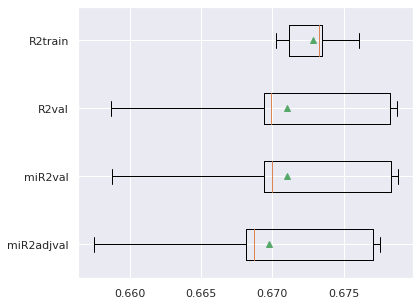

In [ ]:
# Seleccionamos primeramente nuestro modelo de aprendizaje automático, en este caso el de regresión lineal múltiple:
modelo_LR = LinearRegression()

# En ocasiones se calculan también los desempeños del conjunto de entrenamiento en cada partición 
# para tener otra manera de medir el sobreentrenamiento. Aunque es opcional, ya que esto
# implica un mayor costo computacional y hay otras maneras de medir el sobreentrenamiento. Sin
# embargo en este caso sí los estaremos calculando a manera de ilustración:

scoresR2Train = []       # R2 del conjunto de entrenamiento.
scoresR2Val = []         # R2 del conjunto de validación con filtración.
scoresmiR2Val = []       # R2 del conjunto de validación sin filtración.
scoresmiR2adjVal = []    # R2 ajustada sin filtración.
scoresRMSEVal = []       # RMSE

# Inicializamos validación-cruzada usando KFold con k=n_splits particiones.
# Observa que estamos aleatorizando los registros (con el argumento shuffle), ya que no sabemos si los 
# datos originales fueron guardados en los archivos con algún patrón particular.
k = 5  # total de particiones (folds)
kf = KFold(n_splits= k, shuffle=True)   

# Aplicamos validación-cruzada mediante la evaluación de cada una de las k particiones:
for train_index, val_index in kf.split(Xtrain):

  # En cada partición definimos ahora sí el conjunto de entrenamiento y el de validación:   
  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  # Aplicamos las transformaciones al conjunto de entrenamiento:
  XtrainFit = columnasTransformer.fit(X_train)   # Generamos la información necesaria con el conjunto de entrenamiento.
  XtrainTransf = XtrainFit.transform(X_train)    # y aplicamos dichas transformaciones al conjunto de entrenamiento,
  XvalTransf  =  XtrainFit.transform(X_val)      # y al conjunto de validación.
  ymtrain = np.mean(y_train)   # También requeriremos el promedio de las observaciones de entrenamiento para calcular Syy.

  # Generamos el modelo de regresión lineal con los datos de entrenamiento de esta partición:
  modelo_LR = modelo_LR.fit(XtrainTransf, y_train)
  scoresR2Train.append(modelo_LR.score(XtrainTransf,y_train))   # guardamos el desempeño R2 con los datos de entrenamiento.
  
  yhat = modelo_LR.predict(XvalTransf)  # obtenemos las predicciones con el conjunto de validación.
  scoresR2Val.append(modelo_LR.score(XvalTransf, y_val))   # guardamos los valores de R2, aunque en este caso hay filtración
                                                           # de datos ya que "score" hace aquí uso de del promedio de y_val.
  
  # Calcularemos el valor de R2 con nuestras fórmulas para mostrar que en este caso, aunque pequeña, hay filtración.
  # mi_R2:
  sse = mi_SSE(y_val, yhat)
  syy = mi_Syy(y_val, ymtrain)   # esta función evita la filtración de información al usar el promedio de los datos de entrenamiento.
  scoresmiR2Val.append(1 - sse/syy)

  # mi_R2_ajustada. Recordemos que en un problema de regresión lineal múltiple, es mejor considerar el valor ajustado de R2.
  tmp = mi_R2adj(sse,syy,XvalTransf.shape[0],XvalTransf.shape[1])
  scoresmiR2adjVal.append(tmp)

  # Calculamos también el error cuadrático medio RMSE a partir del MSE que nos da scikit-learn:
  ss = mean_squared_error(y_val, yhat, squared=False) 
  scoresRMSEVal.append(ss)


# Mostremos los diagramas de caja de los resultados obtenidos:
results = [scoresmiR2adjVal,scoresmiR2Val,scoresR2Val,scoresR2Train]
names = ['miR2adjval','miR2val','R2val','R2train']

sns.set(rc={'figure.figsize':(6,5)})
plt.boxplot(results, labels=names, showmeans=True, vert=False)
plt.show()


Recuarda que estos diagramas de caja (o caja y bigote, en inglés "box and whisker plot" o simplemente "boxplot" ) son una manera rápida de visualizar la distribución de un conjunto de datos. El rectángulo inicia en el lado izquierdo en el primer cuartil $Q_1$ y termina en el tercer cuartil $Q_3$. La mediana se indica con la línea vertical dentro del rectángulo y el triángulo nos indica el valor de la media. Los valores de $Q_1$ y $Q_3$ nos indican que a su izquierda se encuentran el $25\%$ y $75\%$ de los datos, respectivamente, al ordenarlos de manera ascendente. Estos dos cuartiles contienen el $50\%$ de los datos centrales. A la longitud del rectángulo se le llama rango intercuartil y se denota usualmente como $IQR$, por sus siglas en inglés.

Por su parte los bigotes, indicados por las líneas a los lados, nos hablan de la dispersión de los datos más alejados. A partir de 1.5 veces la longitud del rango intercuartil suelen indicarse los valores más alejados, llamados valores extremos (outliers en inglés). Cuando aparecen suelen indicarse con puntos o círculos. 

In [ ]:
# Despleguemos los resultados de los diferentes coeficientes de determinación obtenidos:

print("\t  %s \t%s   \t%s \t%s" % (names[3],names[2],names[1],names[0]))

for i,z in enumerate(zip(scoresR2Train, scoresR2Val, scoresmiR2Val, scoresmiR2adjVal)):
  print("fold[%d]:  %.4f \t%.4f  \t%.4f  \t%.4f" % (i+1,z[0],z[1],z[2],z[3]))

print("mean(std) %.3f(%.3f)  %.3f(%.3f)    %.3f(%.3f)    %.3f(%.3f)" % (np.mean(scoresR2Train), np.std(scoresR2Train),
                                                                        np.mean(scoresR2Val), np.std(scoresR2Val),
                                                                        np.mean(scoresmiR2Val), np.std(scoresmiR2Val),
                                                                        np.mean(scoresmiR2adjVal), np.std(scoresmiR2adjVal)))

	  R2train 	R2val   	miR2val 	miR2adjval
fold[1]:  0.6761 	0.6586  	0.6587  	0.6574
fold[2]:  0.6733 	0.6699  	0.6700  	0.6687
fold[3]:  0.6735 	0.6694  	0.6694  	0.6681
fold[4]:  0.6702 	0.6783  	0.6783  	0.6771
fold[5]:  0.6712 	0.6788  	0.6788  	0.6776
mean(std) 0.673(0.002)  0.671(0.007)    0.671(0.007)    0.670(0.007)


Observa que tanto en los diagramas de caja como en la tabla anterior, el coeficiente de determinación del conjunto de entrenamiento R2train, tiene menor variabilidad y un mayor promedio. Esto es de esperarse ya que se están usando los mismos datos de entrenamiento para evaluar el desempeño. Aunque también observamos que la diferencia de valores entre el conjunto de entrenamiento (train) y los de validación (val) no es tan marcada, lo cual nos empieza a hablar de un modelo no sobreentrenado.

Por otra parte, observamos que en este problema en particular el valor de $R^2$ con los conjuntos de validación de cada partición R2val y el equivalente obtenido con nuestra función miR2val, son casi idénticas. La diferencia está en que con nuestras fórmulas no utilizamos el promedio de los datos de validación en cada partición para evitar el filtrado de información (data leakage). En este ejemplo la diferencia es mínima, pero no siempre será así. Estos son los detalles que debes empezar a cuidar y tomar en cuenta, ya que estos detalles son los que empiezan a marcar la diferencia entre un buen científico de datos de uno promedio.  

Finalmente observamos que los valores de los coeficientes de determinación ajustado $R^2\_adj$ son ligeramente menores en cada partición al $R^2$ sin ajuste, como también habíamos comentado que debe suceder.

In [ ]:
# Y ahora despleguemos los valores de RMSE de validación de cada partición:

print("\t  RMSEval")

for i,s in enumerate(scoresRMSEVal):
  print("fold[%d]:  %.2f" % (i+1,s))

#print("\t %.2f (%.2f)" % (np.mean(scoresMSEVal), np.std(scoresMSEVal))) 
print("mean(std) %.2f (%.2f)" % (np.mean(scoresRMSEVal), np.std(scoresRMSEVal))) 

	  RMSEval
fold[1]:  68319.58
fold[2]:  66045.85
fold[3]:  65996.89
fold[4]:  67191.62
fold[5]:  65004.53
mean(std) 66511.69 (1138.80)


**NOTA-Opcional**: Existen varias librerías para un despliegue tabular de los datos más adecuado. 

En particular puedes consultar la el siguiente paquete: https://pypi.org/project/tabulate/ 

#**6 - Modelo final, el conjunto de prueba (test) y conclusiones**

En general se recomienda utilizar diferentes métricas para medir el desempeño ya que entre ambas se puede complementar la información obtenida.

En nuestro caso hemos usado el coeficiente de determinación y la raíz del error cuadrático medio.

Supongamos que ya estamos satisfachos con el modelo generado, entonces ya estamos listos para finalmente utilizar el conjunto de prueba (Test) para obtener el desempeño final de nuestro modelo.

Pero aquí realizamos otro ajuste que es importante tomar en cuenta y que usualmente se pasa desapercibido. 

En resumen, hasta ahora ya tenemos un conjunto de primeras decisiones que nos están llevando a construir un primer mejor modelo para este ejemplo de las datos del California Housing Prices, a saber, aplicar imputación con el valor de la mediana a todas las variables, seguida de una transformación al intervalo [1,2], para después aplicar la transformación de raíz cuadrada a las variables con un marcado sesgo positivo y finalmente aplicar el modelo de regresión lineal múltiple con los argumentos predeterminados de la librería scikit-learn.  

###**Conjuntemos todos estos pasos previos para construir nuestro mejor modelo. Pero antes de validar el modelo con el conjunto de prueba, realicemos un último entrenamiento pero usando con el conjunto de entrenamiento de datos completo, es decir, conjuntando los datos que usamos para entrenar y los que usamos para validar dentro del ciclo de validación-cruzada. Es decir, en este caso se traduce a utilizar todo el conjunto de datos de entrenamiento (train) del archivo original que cargamos del Google-Colab. Esto se hace para que el modelo final pueda tener un poco más de datos con los cuales aprender todavía un poco mejor; pero toma en cuenta que ya no se permitirá hacer modificaciones a partir de estos resultados, porque entonces estaríamos de nuevo filtrando información al modelo.**


Procedamos entonces a generar nuestro modelo final con este nuevo conjunto de entrenamiento y obtener su desempeño final con los datos de prueba. Cabe recordar que los datos de prueba no los hemos utilizado hasta ahora, como debe ser.



In [ ]:
# Inicializamos de nuevo nuestro mejor modelo con sus parámetros predeterminados:
modelo_LRf = LinearRegression()

# Ajustamos las transformaciones con el conjunto de "entrenamiento aumentado", i.e., el train-set 
# completo del archivo inicial, pero con los MISMOS PASOS que ya se decidieron en la etapa de entrenamiento previa:
XtrainTf = columnasTransformer.fit(Xtrain)
XtrainFTf = XtrainTf.transform(Xtrain)   # Aplicamos las mejores transformaciones  a los datos completos de train.
XtestFTf = XtrainTf.transform(Xtest)     # Aplicamos las transformaciones a Test con la información de Train para evitar la filtración.
                                         # Observa que esta es la primera vez que usamos los datos de prueba (Test) desde que iniciamos.

modelo_LRf = modelo_LRf.fit(XtrainFTf, ytrain)   # Entrenamos el mejor modelo con el conjunto de "entrenamiento aumentado".

yhatf = modelo_LRf.predict(XtestFTf)    # Generamos las predicciones con los datos de prueba (Test).

ymtrainf = np.mean(ytrain)     # Obtenemos el promedio de los datos de entrenamiento (recuerda que sklearn no nos regresa R2adj).
ssef = mi_SSE(ytest, yhatf)
syyf = mi_Syy(ytest, ymtrainf)
miR2adjf = mi_R2adj(ssef,syyf,XtestFTf.shape[0],XtestFTf.shape[1])   # Obtenemos R2adj con nuestra función que definimos previamente.

print("Métricas de desempeño del modelo final obtenido con el conjunto de prueba:")
print("Coeficiente de determinación ajustado: miR2adj = %.4f" % miR2adjf)

#print("Coeficiente de determinación R2 con filtración: %.4f" % modelo_LRf.score(XtestFTf, ytest))   

RMSEtestf = mean_squared_error(ytest, yhatf, squared=False)
print("Raíz del error cuadrático medio: RMSE = %.2f" % RMSEtestf)

Métricas de desempeño del modelo final obtenido con el conjunto de prueba:
Coeficiente de determinación ajustado: miR2adj = 0.6396
Raíz del error cuadrático medio: RMSE = 67756.78


In [ ]:
# Recordemos que el coeficiente de determinación lo podemos interpretar como el siguiente porcentaje:

print("Porcentaje de variabilidad de la variable de salida explicado por las variables de entrada: %.1f%%, aproximadamente" 
      % (100*miR2adjf))

Porcentaje de variabilidad de la variable de salida explicado por las variables de entrada: 64.0%, aproximadamente



En general, valores del coeficiente de determinación arriba del 60% pueden considerarse aceptables en muchos problemas. Por otro lado, la diferencia de este valor porcentual con los resultados obtenidos durante la etapa de entrenamiento con la validación-cruzada, podría hablar de un ligero sobreentrenamiento que habría que trabajar en reducirlo en una segunda iteración del modelo, pero por el momento se puede considerar aceptable a secas. Así, pareciera que hemos construido un buen primer modelo. Sin embargo, recuerda que en el área de estadística y aprendizaje automático no hay reglas generales y es aquí donde es importante el análisis de varias métricas que nos ayuden a complementar la información. 

###**Recuerda que en todo problema de aprendizaje supervisado se tienen dos problemas principales a superar, el sobreentrenamiento y el subentrenamiento**.

Veamos entonces que nos dice la otra métrica, $RMSE$, en el conjunto de prueba.  

Para ello realicemos el siguiente análisis y razonamiento:

In [ ]:
# La predicción del valor promedio de una casa obtenida con nuestro modelo final
# tiene una variabilidad de error promedio en unidades monetarias dadas por RMSE:

print("La variabilidad en el valor promedio de los precios de las casas es de aproximadamente $%.2f" % RMSEtestf)

La variabilidad en el valor promedio de los precios de las casas es de aproximadamente $67756.78


In [ ]:
# Entonces la diferencia en valor absoluto entre el error típico en las predicciones del modelo final generado
# con el conjunto de prueba, con respecto al error típico obtenido con los datos de validación durante la etapa
# de validación-cruzada es la siguiente :

print("|RMSEtest - RMSEval| = $%.2f" % (np.abs(RMSEtestf - np.mean(scoresRMSEVal))))

|RMSEtest - RMSEval| = $1245.09


In [ ]:
# Lo cual nos lleva al siguiente error absoluto porcentual entre el error típico de predicción del conjunto de prueba
# y el conjunto de validación obtenido durante la etapa de entrenamiento en la validación-cruzada, de:

print("Diferencia del error porcentual entre RMSEtest y RMSEval de aproximadamente %.1f%%" % (100 * np.abs(RMSEtestf - np.mean(scoresRMSEVal)) / np.mean(scoresRMSEVal)))

Diferencia del error porcentual entre RMSEtest y RMSEval de aproximadamente 1.9%


Y obtenemos un error porcentual promedio relativamente aceptable. Es decir, nuevamente concluimos, aunque ahora con la métrica RMSE, que el sobreentrenamiento no es por el momento nuestra mayor preocupación.

Pero veamos ahora qué información podemos obtener en relación a si nuestro modelo puede estar subentrenado.

Para ello realicemos el siguiente razonamiento usando el valor del rango intercuartil (denotado IQR) de la variable de salida en los datos de entrenamiento.

Recuerda que el rango intercuartil, definido $IQR=Q_3 - Q_1$, es la longitud sobre la cual varía el $50\%$ de los datos centrales.


In [ ]:
q3 = np.quantile(ytrain, 0.75)
q1 = np.quantile(ytrain, 0.25)

print("Rango intercuartil: IQR = Q3 - Q1 = $%.2f - $%.2f = $%.2f" % (q3,q1,q3-q1))

Rango intercuartil: IQR = Q3 - Q1 = $265000.00 - $119400.00 = $145600.00


Observamos que es un poco más de 2 veces el error típico de predicción de los datos de prueba:

In [ ]:
print(2.1 * RMSEtestf)

142289.24092440124


Es decir, obtenemos que la variabilidad de los residuos $\pm RMSEtest$ está aproximadamente en el valor del rango intercuartil $IQR$ de la variable de salida.

En otras palabras, esta diferencia nos da una idea sobre la diferencia promedio entre cada predicción realizada con nuestro modelo y los datos reales observados. Dicha diferencia tiene un error de más menos una magnitud de aproximadamente el valor del rango intercuartil de los precios de las casas, es decir, nuestras predicciones tienen un error de variabilidad promedio que anda alrededor de un $50\%$ de los precios reales observados, lo cual obviamente no suena de mucha ayuda para usarlo con datos de la vida real.

Es decir, este resultado nos dice que nuestro modelo generado no es lo suficientemente robusto como para generar buenas predicciones. Se queda muy por debajo de ello. 

**Es decir, nuestro modelo está subentrenado.**

Podemos decir que nuestro modelo lineal se está quedando demasiado corto para predecir de manera adecuado la complejidad no lineal de los datos de entrada. 



¿Qué podemos hacer para corregir un modelo que está subentrenado? 

En principio existen varias opciones, entre las que podemos mencionar las siguientes: 



*   Los factores usados no tienen suficiente información para generar un buen modelo y se recomienda buscar y agregar factores que proporcionen mayor valor a la variable de salida. Igualmente podría ser recomendable eliminar algunos factores que no estén dando valor al modelo y sí introduciendo ruido al modelo.
*   Reducir las restricciones impuestas al modelo. Estas restricciones pueden ser las técnicas de regularización que veremos más adelante y que en este ejemplo no aplicamos.
*   Intentar utilizar otro modelo más complejo que permita explicar mejor los comportamientos no lineales de los datos. 

####**Con base a estos criterios ¿cuál opción crees que sería conveniente intentar primero? ¿Por qué?**

Podríamos intentar buscar y agregar variables de entrada más ricas en información (aplicar la llamada ingeniería de factores), realizar algunos otros ajustes en los valores de entrada (por ejemplo, verificar la correlación entre las variables), o tomar algún otro tipo de decisiones en el proceso anterior (como aplicar otro de los métodos de validación-cruzada que tiene scikit-learn), pero al final sabemos que los modelos de regresión lineal en general pueden estar limitados para problemas de una gran complejidad no lineal.

Igualmente podríamos buscar y utilizar funciones de otras librerías y paquetes que nos permitan realizar un mejor preprocesamiento y construcción del modelo. Sabemos que cada librería tiene sus ventajas y desventajas.

Toma en cuenta que raramente se obtiene el modelo ideal buscado al primer intento de su generación. Más bien, en general uno inicia con la aplicación de procedimientos estándar para tener un modelo de partida y a partir del cual se intentará irlo mejorando. En inglés se le suele llamar el "baseline".

Así que por el momento dejaremos de seguir intentando mejorar este modelo y más adelante, cuando estudiemos en el curso modelos de mayor complejidad, regresaremos de nuevo a este problema para tratar de mejorarlo y veremos que en esta ocasión resultará mejor cambiar de modelo de aprendizaje automático, antes que seguir intentando modificar el actual.





Sobra decir que no hay reglas generales en el área de aprendizaje automático, pero ve considerando en el futuro todas las decisiones que hemos venido mencionado y aplícalas cuando lo consideres adecuado, esto  te irá dando poco a poco mayor valor como analista y tomador de decisiones dentro del área de aprendizaje automático. 

Por otro lado, en los problemas que estaremos estudiando en las siguientes semanas del curso ya no explicaremos de manera tan detallada las decisiones tomadas en la etapa de preprocesamiento y limpieza de los datos, esto para hacer énfasis en las temáticas que en cada semana se esté tratando. En dado caso que no te quede claro alguno de estos procesos, siempre puedes regresar a este archivo y repasar los conceptos. 

**\<\<Fin de la actividad de la semana 2>>**